# 0. Import dependencies

In [32]:
import torch
import sklearn
import numpy as np


In [33]:
from sklearn.datasets import make_classification
torch.manual_seed(123)


# 1. Working with datasets

## 1.1 Creating the datasets
Creating a toy dataset with `sklearn.make_classification()`.

In [34]:
# Make a Toy Dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2)

# Change it into the Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [35]:
print(f'X: {X.ndim} dim(s)\n', 'Shape of X: ', np.shape(X), '\n', X, sep='')

X: 2 dim(s)
Shape of X: torch.Size([1000, 4])
tensor([[-0.6218,  0.1526, -0.1284,  0.6886],
        [-0.8437, -1.0751, -1.1048,  1.2961],
        [ 1.2264,  1.9068,  1.8556, -1.9811],
        ...,
        [ 0.8533,  2.0282,  1.8002, -1.5763],
        [-0.1534, -0.9785, -0.7691,  0.4565],
        [-1.1979, -1.2535, -1.3705,  1.7632]])


In [36]:
print(f'y: {y.ndim} dim(s)\n', 'Shape of y: ', np.shape(y), '\n', y, sep='')

y: 1 dim(s)
Shape of y: torch.Size([1000])
tensor([1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0

## 1.2 Shuffling the datasets
Shuffling using the `torch.randperm()` function. Learn more about this function [here](https://pytorch.org/docs/stable/generated/torch.randperm.html).

Here, the first argument needs to be the size `n` in `int`. The `y.size()` simply won't work since the `torch.Tensor.size()` function returns the size as an object. We pass in the first dimension (0th) to retrieve size of the first dim in `int`. Values other than 0 won't work since this tensor only has one dim. 

In [37]:
# Shuffling data
torch.manual_seed(10)

# Creating a shuffled dataset ranging from 0 to n - 1 (999)
shuffledData = torch.randperm(y.size(0), dtype=torch.long)

# Printing a sample from our shuffled data
print(f'Sampled shuffled data:\n\n{shuffledData[:10]}')


Sampled shuffled data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])


In [38]:
print(f'Shuffled generated data:\n\n{shuffledData}')

Shuffled generated data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  85,
        988, 667,  48, 762, 646, 510, 

We've created a list of indices that are sorted. Now mapping the shuffled indices to create a shuffled dataset.

In [39]:
X, y = X[shuffledData], y[shuffledData]

In [40]:
print(f'Shuffled X:\n\n{X}')

Shuffled X:

tensor([[ 0.6295,  0.0258,  0.2608, -0.7481],
        [-0.2993, -0.8982, -0.7670,  0.6056],
        [ 3.1527, -2.4657, -0.5771, -3.0140],
        ...,
        [-1.5609, -1.2675, -1.5202,  2.1943],
        [ 0.0621,  0.7374,  0.5591, -0.2812],
        [ 1.1929, -0.6002,  0.0232, -1.2343]])


In [41]:
print(f'Shuffled y:\n\n{y}')

Shuffled y:

tensor([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 1., 0.,

## 1.3 Splitting the dataset into training and testing data

### 1.3.1 Shuffling data

In [42]:
# Train Test split
shuffledTrainDataMakeup = int(shuffledData.size(0) * 0.7)

shuffledTrainData = shuffledData[:shuffledTrainDataMakeup]
shuffledTestData = shuffledData[shuffledTrainDataMakeup:]


How much does the training data make up of the actual dataset.

In [43]:
print(f'Training data makeup: {shuffledTrainDataMakeup}\n\n')


Training data makeup: 700




Details of the training data.

In [44]:
print(f'Printing details of training data\n\nShape: {np.shape(shuffledTrainData)}\n\nData:\n{shuffledTrainData}')


Printing details of training data

Shape: torch.Size([700])

Data:
tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  8

Details of the testing data.

In [45]:
print(f'Printing details of testing data\n\nShape: {np.shape(shuffledTestData)}\n\nData:\n{shuffledTestData}')


Printing details of testing data

Shape: torch.Size([300])

Data:
tensor([313, 279, 258, 960, 532, 419,  49, 777, 435, 444, 387,  23,  17, 566,
        862, 637, 728,  34,  19, 274, 331, 760, 508, 149, 893, 563, 596, 991,
        941, 565,   1, 780, 161, 461, 452, 883, 900, 569, 556, 334,  64, 839,
        122, 308, 561, 516, 567,  90, 616, 184, 396, 138, 687, 344, 338, 528,
        554, 868, 504, 976,  91, 113, 536, 490, 527, 804, 605, 854, 424, 235,
         67, 350, 601, 879, 821, 152, 621, 829, 473,  39, 825, 241, 653, 709,
        624, 472,  42, 755,  25, 622, 906, 287, 165, 125, 916, 660, 223, 446,
        691, 947, 878, 546,  68, 328, 911, 515, 434,   3, 203, 787, 181,   7,
        335, 822, 852, 289, 295, 708, 698, 826, 577, 695, 923, 788, 456, 482,
        881, 631, 132,  79, 477, 202, 404,   8, 619, 651, 506, 704, 772, 175,
        696, 985, 501,  26, 884, 511, 591, 222, 234, 194, 426, 540,  36, 608,
        146, 867, 694, 147, 284, 519, 517, 427, 830, 964, 293, 652, 948, 815

In [46]:
X_train, y_train = X[shuffledTrainData], y[shuffledTrainData]
X_test, y_test = X[shuffledTestData], y[shuffledTestData]


Printing details of shuffled training and testing data

In [47]:
X_train.shape


torch.Size([700, 4])

In [48]:
X_train


tensor([[ 1.0916, -0.3147,  0.1914, -1.1957],
        [ 1.4628,  0.1220,  0.6511, -1.7556],
        [ 0.4834, -0.7971, -0.3926, -0.3439],
        ...,
        [-0.3148, -0.8551, -0.7416,  0.6116],
        [ 0.0243,  1.0230,  0.7518, -0.3172],
        [-0.7875,  0.5500,  0.0963,  0.7715]])

In [49]:
X_test.shape


torch.Size([300, 4])

In [50]:
X_test


tensor([[-0.6815, -0.8669, -0.8912,  1.0465],
        [ 0.4669, -0.1985,  0.0355, -0.4934],
        [ 0.8490, -1.1077, -0.4774, -0.6865],
        ...,
        [-0.6281, -0.7511, -0.7867,  0.9510],
        [ 1.1795, -0.7411, -0.0843, -1.1788],
        [-0.0058, -0.8025, -0.5847,  0.2332]])

## 1.4 Normalising data

In [75]:
mean, std = X_train.mean(dim=0), X_train.std(dim=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


## 1.5 Building a Neural Network

Importing libraries

In [54]:
import torch.nn as nn
from torch.autograd import grad


Class definition for the neural network

In [55]:
class NN():
    def __init__(self, n_features):
        self.n_features = n_features
        self.weight = torch.zeros(
            size=(n_features, 1), dtype=torch.float, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float, requires_grad=True)

    def forward(self, x):
        output = torch.add(torch.mm(x, self.weight), self.bias)
        return output.view(-1)


Defining our loss function. Looks oddly similar to the mean square error function.

In [ ]:
def loss_fn(yHat, y):
    return torch.mean((yHat - y) ** 2)

Function to train the model.

In [56]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the output
            yHat = model.forward(x[idx])

            # 2. Compute the Error
            loss = loss_fn(yHat, y[idx])

            # 3. Compute the gradient
            grad_w = grad(loss, model.weight, retain_graph=True)[0]
            grad_b = grad(loss, model.bias)[0]

            # 4. Update Model Parameters
            model.weight = model.weight-lr*grad_w
            model.bias = model.bias-lr*grad_b

        # 5. Log and print the loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            print('Epoch: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [57]:
model = NN(X_train.size(1))
cost = train(model, X_train, y_train, n_epoch=50)


Epoch:   1 | MSE  0.46399
Epoch:   2 | MSE  0.43322
Epoch:   3 | MSE  0.40583
Epoch:   4 | MSE  0.38131
Epoch:   5 | MSE  0.35935
Epoch:   6 | MSE  0.33957
Epoch:   7 | MSE  0.32171
Epoch:   8 | MSE  0.30551
Epoch:   9 | MSE  0.29080
Epoch:  10 | MSE  0.27739
Epoch:  11 | MSE  0.26511
Epoch:  12 | MSE  0.25386
Epoch:  13 | MSE  0.24353
Epoch:  14 | MSE  0.23400
Epoch:  15 | MSE  0.22518
Epoch:  16 | MSE  0.21703
Epoch:  17 | MSE  0.20949
Epoch:  18 | MSE  0.20247
Epoch:  19 | MSE  0.19594
Epoch:  20 | MSE  0.18986
Epoch:  21 | MSE  0.18417
Epoch:  22 | MSE  0.17886
Epoch:  23 | MSE  0.17389
Epoch:  24 | MSE  0.16923
Epoch:  25 | MSE  0.16486
Epoch:  26 | MSE  0.16076
Epoch:  27 | MSE  0.15690
Epoch:  28 | MSE  0.15327
Epoch:  29 | MSE  0.14986
Epoch:  30 | MSE  0.14666
Epoch:  31 | MSE  0.14364
Epoch:  32 | MSE  0.14078
Epoch:  33 | MSE  0.13810
Epoch:  34 | MSE  0.13557
Epoch:  35 | MSE  0.13318
Epoch:  36 | MSE  0.13093
Epoch:  37 | MSE  0.12881
Epoch:  38 | MSE  0.12680
Epoch:  39 |

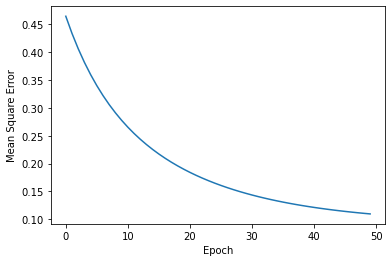

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.show()


In [59]:
ones = torch.ones(y_train.size())
zero = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
train_acc = torch.mean((
    torch.where(train_pred > 0.5,
                ones, zero).int() == y_train).float())


ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 91.43
Testing Accuracy: 90.67


### Model Using Pytorch

In [60]:
import torch
import sklearn
import torch.nn.functional as F


In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [62]:
# Create The dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4)

# Normalize the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [64]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)



    

In [65]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    shuffledData=torch.randperm(y.size(0))
    batches=torch.split(shuffledData,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [66]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [67]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.49236
Epoc:   2 | MSE  0.46682
Epoc:   3 | MSE  0.44315
Epoc:   4 | MSE  0.42121
Epoc:   5 | MSE  0.40087
Epoc:   6 | MSE  0.38197
Epoc:   7 | MSE  0.36442
Epoc:   8 | MSE  0.34809
Epoc:   9 | MSE  0.33289
Epoc:  10 | MSE  0.31874
Epoc:  11 | MSE  0.30555
Epoc:  12 | MSE  0.29327
Epoc:  13 | MSE  0.28180
Epoc:  14 | MSE  0.27110
Epoc:  15 | MSE  0.26111
Epoc:  16 | MSE  0.25178
Epoc:  17 | MSE  0.24305
Epoc:  18 | MSE  0.23489
Epoc:  19 | MSE  0.22726
Epoc:  20 | MSE  0.22012
Epoc:  21 | MSE  0.21343
Epoc:  22 | MSE  0.20718
Epoc:  23 | MSE  0.20132
Epoc:  24 | MSE  0.19583
Epoc:  25 | MSE  0.19068
Epoc:  26 | MSE  0.18586
Epoc:  27 | MSE  0.18134
Epoc:  28 | MSE  0.17710
Epoc:  29 | MSE  0.17312
Epoc:  30 | MSE  0.16939
Epoc:  31 | MSE  0.16589
Epoc:  32 | MSE  0.16261
Epoc:  33 | MSE  0.15953
Epoc:  34 | MSE  0.15663
Epoc:  35 | MSE  0.15392
Epoc:  36 | MSE  0.15137
Epoc:  37 | MSE  0.14897
Epoc:  38 | MSE  0.14672
Epoc:  39 | MSE  0.14461
Epoc:  40 | MSE  0.14262


[]

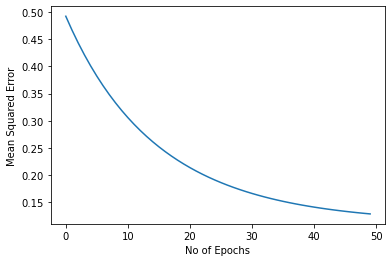

In [68]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [69]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.81
Testing Accuracy: 0.82


### Logistic Regression

In [70]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    shuffledData=torch.randperm(y.size(0))
    batches=torch.split(shuffledData,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [71]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [72]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.51335
Epoc:   2 | MSE  0.50689
Epoc:   3 | MSE  0.50062
Epoc:   4 | MSE  0.49454
Epoc:   5 | MSE  0.48863
Epoc:   6 | MSE  0.48291
Epoc:   7 | MSE  0.47736
Epoc:   8 | MSE  0.47198
Epoc:   9 | MSE  0.46677
Epoc:  10 | MSE  0.46172
Epoc:  11 | MSE  0.45684
Epoc:  12 | MSE  0.45212
Epoc:  13 | MSE  0.44756
Epoc:  14 | MSE  0.44314
Epoc:  15 | MSE  0.43888
Epoc:  16 | MSE  0.43477
Epoc:  17 | MSE  0.43081
Epoc:  18 | MSE  0.42698
Epoc:  19 | MSE  0.42330
Epoc:  20 | MSE  0.41975
Epoc:  21 | MSE  0.41634
Epoc:  22 | MSE  0.41307
Epoc:  23 | MSE  0.40992
Epoc:  24 | MSE  0.40690
Epoc:  25 | MSE  0.40401
Epoc:  26 | MSE  0.40124
Epoc:  27 | MSE  0.39859
Epoc:  28 | MSE  0.39607
Epoc:  29 | MSE  0.39365
Epoc:  30 | MSE  0.39136
Epoc:  31 | MSE  0.38917
Epoc:  32 | MSE  0.38710
Epoc:  33 | MSE  0.38514
Epoc:  34 | MSE  0.38328
Epoc:  35 | MSE  0.38153
Epoc:  36 | MSE  0.37988
Epoc:  37 | MSE  0.37833
Epoc:  38 | MSE  0.37688
Epoc:  39 | MSE  0.37553
Epoc:  40 | MSE  0.37427


[]

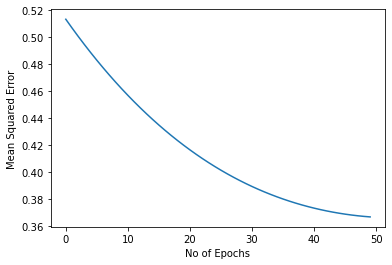

In [73]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [74]:
ones = torch.ones(y_train.size(0))
zero = torch.zeros(y_train.size(0))
train_pred = model.forward(X_train)

train_acc = torch.mean(
    (torch.where(train_pred > 0.5, ones, zero).int() == y_train).float())
# print(train_acc)

ones = torch.ones(y_test.size(0))
zero = torch.zeros(y_test.size(0))
test_pred = model.forward(X_test)

test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zero).int() == y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy : 0.58
Testing Accuracy: 0.63
